#### Red wine pipeline

In [3]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib


In [6]:
# Load the dataset
path = r"C:\Users\kanyi\Desktop\practice_ml_fast_api\winequality-red.csv"
df = pd.read_csv(path, sep=";")

In [7]:
# display the first five dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1. Data Overview

- This project uses a dataset of 1,599 red wine samples.
- Each wine has 11 measurements that describe its chemical properties (acidity, sugar, and alcohol level) and a quality score (the target variable) rated between 3 and 8.

- The goal is to understand what makes a wine “good” or “bad,” and prepare the data for a machine learning model that predicts wine quality.


####

In [11]:
# Check the desciptive summary of the dataset
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


2. What the data tells us

Features 
- The alcohol, acidity and the sulphates have strong influence on the quality of the data. The std is low which means theres low disparity between the data point
- The features are not in the same range, hence scaling is strongly recommended.
- The sulfur dioxides have high variability indicating they are not stable and may affect the quality of the wine.

Target
- The wine quality scores (our target variable) mostly fall between 5 and 6, meaning most wines are of average quality.
- Only a few wines scored very low (3–4) or very high (7–8).



In [ ]:
# Check for duplicates
df.duplicated().sum()

np.int64(240)

In [ ]:
# Drop the duuplicates
df.drop_duplicates(inplace=True)

In [ ]:
# recheck the du[licates have been handled
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df = df.replace({'quality':{8:'Best', 7:'Good', 6:'Good', 5:'Average', 4:'Bad', 3:'Bad'}})

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Average


3. Getting the Data Ready for Modeling

- No missing or invalid values. 
- The data set consist of duplicate values and were handled by dropping them.
- All columns were numerical (no need for encoding).
- The target was reclassified 
- Since each feature uses different measurement units, we  will standardize them using MinMaxScaler to put them all on the same scale (0,1), so the model can learn fairly from each one.
- we split the data into feature and target, also train and test sets.
- After this, the data was ready to train ML algorithm.

In [ ]:
# Split int feature and target 
y = df['quality']
X = df.drop('quality', axis=1)

In [16]:
# Scale the feature columns
scaler = MinMaxScaler(feature_range=(0,1))

X_scaled = scaler.fit_transform(X)


In [17]:
# Split the data into train test 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Create a dictionary to store the models
models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(), 
    "KNeighbors": KNeighborsClassifier(),
    "Naive_Bayes": GaussianNB()
}

Trining LogisticRegression...
LogisticRegression Acuuracy: 0.69375


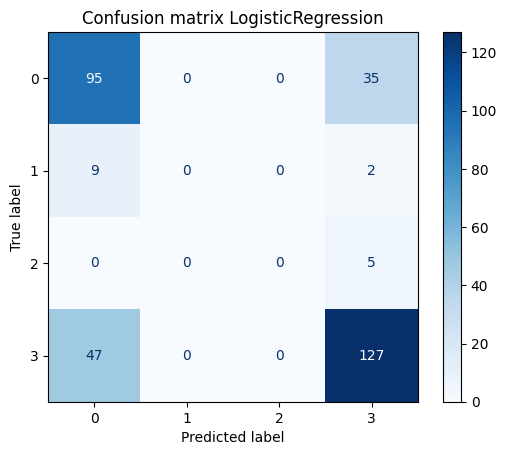

Trining SVM...
SVM Acuuracy: 0.759375


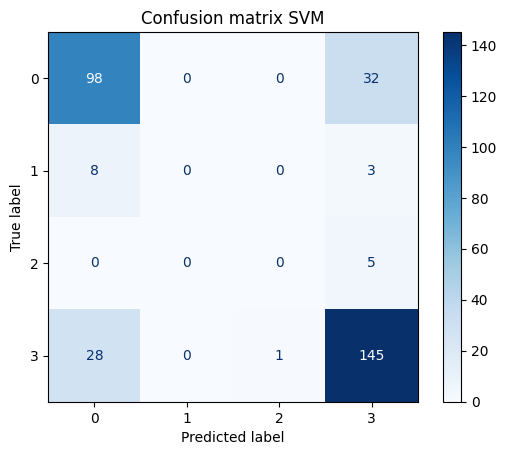

Trining DecisionTree...
DecisionTree Acuuracy: 0.690625


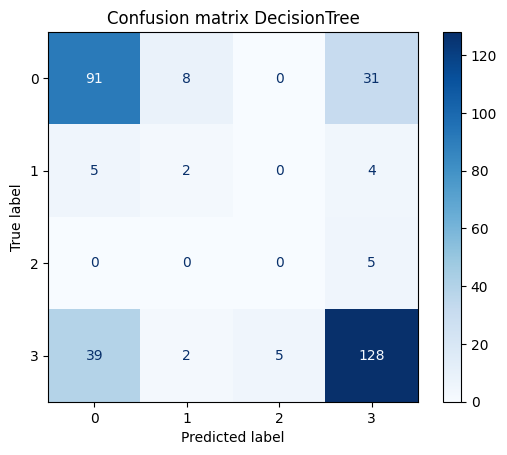

Trining KNeighbors...
KNeighbors Acuuracy: 0.646875


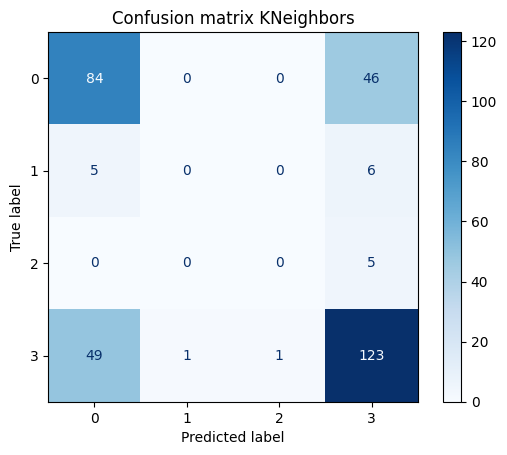

Trining Naive_Bayes...
Naive_Bayes Acuuracy: 0.6875


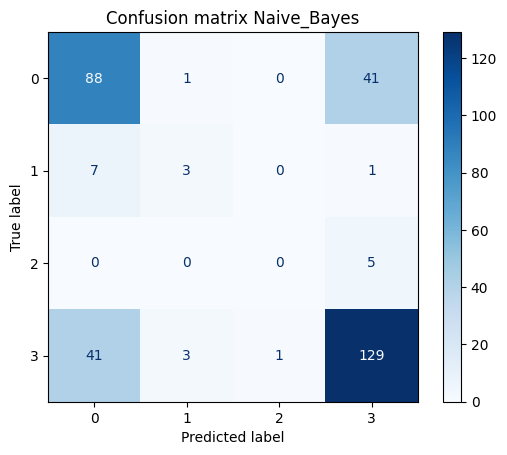

In [ ]:
# Initialize a dictionary to store the models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Acuuracy: {accuracy}")

    # lets include confusion matrix
    cm =confusion_matrix(y_test,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)

    # plot with model name as title
    display.plot(cmap='Blues')
    plt.title(f"Confusion matrix {model_name}")
    plt.show()

4. Training our model

- Created a dictionary to store the number of models for the training.
- We fed our data to the model to learn and use that for the prediction.
- We checked the accuracy score to evaluate the model (to see how well it is predicting)
- Based on the accuracy results, and the ratio of the True Predicted and False Predicted; RandomForest perfromed best.
- Recommend hyperparameter tuning to improve the performance of the model.

In [ ]:
# Lets get the parameter for Random Forest
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
# Lets tune the Random Forest - set Hyperparameters

param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1,2,4],
        'bootstrap': [True, False]
}

# Let's define our RandomSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=234), param_distributions= param_grid, cv=5, n_jobs=1, verbose=1)
random_search.fit(X_train, y_train)
print(f"Best parameter for random Forest: {random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter for random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}


In [26]:
#  Cross Validation score for the best model -Random Forest
best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print(f"Cross Validation score: {cv_scores}")
print(f"Mean Cross Validation score: {cv_scores.mean()}")

Cross Validation score: [0.63125   0.646875  0.734375  0.69375   0.6645768]
Mean Cross Validation score: 0.6741653605015674


6. Hyperparameter result
- Set the parameters using a list to save computational time.
- RamdomSearch method was selected because it is computationally cheap, and it selects random parameters.
- The model that performed best has these parameters - {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
- Cross Validation score was used to check how well the model will perform on new sets of data.
- The average of the cross validation score is 0.67% (estimation of how the model will perform)



In [28]:
# Use the best model to predict
y_pred_rf = best_model.predict(X_test)
print("\n Classification Report")
print(classification_report(y_test, y_pred_rf, zero_division=1))


 Classification Report
              precision    recall  f1-score   support

     Average       0.72      0.75      0.73       130
         Bad       1.00      0.00      0.00        11
        Best       1.00      0.00      0.00         5
        Good       0.78      0.83      0.81       174

    accuracy                           0.76       320
   macro avg       0.88      0.39      0.39       320
weighted avg       0.77      0.76      0.74       320



Summary of Classification Report

- The model’s overall accuracy is 76%, meaning it correctly predicted wine quality in about 3 out of every 4 samples.

- Average-quality wines (most common):
The model did well — it caught most of them correctly (recall = 0.75) and was fairly accurate when it predicted “Average” (precision = 0.72).

- Good-quality wines:
Performance was strong here too (recall = 0.83, F1 = 0.81), showing the model can identify good wines reliably.

- Bad and Best wines:
These classes have very few samples (only 11 and 5), so the model didn’t learn their patterns well — it barely recognized any of them (recall = 0.00).
This is a class imbalance problem, where the model focuses on majority classes (Average/Good) and struggles with rare ones.
- Save the model and the scaler.pkl for reusability

In [29]:
# Let's save our best model as a pickle
joblib.dump(best_model, 'Best_model.pkl')

# Let's save the scaler as a pickle
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler have been successfully saved")

Model and Scaler have been successfully saved
